# Tutorial 2
Course: Creation and Annotation of Linguistic Resources

Department: Computational Linguistics

Semester: Spring 2021

Lecturer: Duygu Ataman

Tutorer: Tobias Weisskopf https://github.com/BlackSquirrelz

---

## Agenda:

- Reading a Text file, and processing it to a more structured format
- Saving the created structure to a JSON or XML Document
- Getting basic statistics
- Process

---

# Examples
Required imports

In [202]:
import xml.etree.ElementTree as ET # For XML Parsing
import csv # For reading CSV
import json
import nltk

nltk.download('punkt')

import spacy
from spacy import displacy
import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Function definitions
Different ways how to read data from the file system

- Example: Read a Text File and process data

## Example - Read a Text File and process data

In this example we will be reading in a text file from the horizons corpus and do some basic analysis on it.

In [82]:
# Generic Function to read a file
def open_file(file_path):
    with open(file_path, 'r', encoding='UTF-8') as f:
        text = [line.strip() for line in f]
    return text

In [83]:
# Example
print("\nReading a regular Text File.")
example_1 = open_file('Data/text-files/issue_109/article_a1/de.txt')

# Extracting Meta information
title = example_1[0][7:]
author = example_1[1][8:]
abstract = example_1[2][10:]

# Adding the article to a dictionary
article_dict = { 'title': title, 'author': author, 'abstract': abstract, 'body': example_1[5:]}


Reading a regular Text File.


### JSON Functions

Now that we have read in the text from a file, we can get a better structure, so we can start processing the data. For instance, the created dictonary can now be stored in a JSON or XML Document for further processing. The benefit is that we do not have to save anything in memory, which frees up resources on our systems and makes the process more robust.

In [84]:
# Function to save a JSON File
def save_json(data, file_name):
    """ Generic function to save dictionary data to a JSON file"""
    with open(file_name, 'w') as f:
        json.dump(data, f, indent=4)

In [85]:
# Function to Read a JSON File
def get_json(file_name):
    """ Generic function to retrieve data from JSON file"""
    with open(file_name) as f:
        data = json.load(f)
        return data

In [86]:
# Saving the article to a JSON File

json_storage = 'Data/processed_data/json/articles.json'
save_json(article_dict, json_storage)

### XML - Functions

Saving the corpus as an XML-File is much more effort compared to saving it as a JSON file, nevertheless, if you are interested, here is an example how to do it. There are a few point that you would need to improve on but its a start:

In [32]:
# Parsing XML Files
def xml_parsing(file_path):
    root_node = ET.parse(file_path).getroot()
    text = [tag.text for tag in root_node.findall('token')]
    return text

In [72]:
# Function to save a XML File
def save_article_xml(data, file_name):
    with open(file_name, "wb") as xml_f:
        xml_f.write(ET.tostring(data))    

In [73]:
print(article_dict['title'])

Waffen, Panzer und Gesetze


In [79]:
# Saving the article to a XML File

xml_storage = 'Data/processed_data/xml/articles.xml'

# Preparing dictionary for writing XML File
data = ET.Element('corpus')
articles  = ET.SubElement(data, 'article')
title = ET.SubElement(articles, 'title')
author = ET.SubElement(articles, 'author')
abstract = ET.SubElement(articles, 'abstract')
body =  ET.SubElement(articles, 'body')

articles.set('title', article_dict['title'])
articles.set('author', article_dict['author'])
articles.set('abstract', article_dict['abstract'])

body_to_string = ''.join(article_dict['body'])

articles.set('body', body_to_string)

save_article_xml(data, xml_storage)

---

## Processing

In the next step we may want to process the data of the article for further usage:

In [87]:
# Reading the data from JSON
data = get_json('Data/processed_data/json/articles.json')

In [88]:
print(data)

{'title': 'Waffen, Panzer und Gesetze', 'author': 'Marcel Hänggi', 'abstract': 'Schweizer Kriegsgüter sind gefragt, der Handel damit ist umstritten.', 'body': ['Die Schweiz will mit Kriegsgütern handeln, damit aber keine bestehenden Konflikte und Menschenrechtsverletzungen nähren: Der Grundsatz ist einfach, die Praxis kompliziert.', 'Im April 2016 bewilligte der Bundesrat Rüstungsexporte in Staaten, die sich am Bürgerkrieg im Jemen beteiligen – darunter Saudi-Arabien. Wie geht das mit dem Grundsatz zusammen, dass die Schweiz keine Waffen für aktuelle Konflikte liefert?', 'Zwei Gesetze und mehrere internationale Abkommen regeln den Export kriegsrelevanter Güter. Das Kriegsmaterialgesetz verbietet atomare, biologische und chemische Waffen, Antipersonenminen und Streumunition sowie deren Finanzierung vollständig. Anderes Kriegsmaterial darf in Länder exportiert werden, die nicht Krieg führen.', 'Das Güterkontrollgesetz unterwirft "besondere militärische Güter" (kein direkter Einsatz im Ge

In [154]:
# Printing the text
text = ''.join(data['body'])

# Statistics on Words
words = nltk.word_tokenize(text)
unique_words = sorted(set(words))

## Analytics
The next steps we can do some basic analytics on the text that we have.

### Basic Statistics

In [117]:
# Statistics on Sentences
sentences = nltk.sent_tokenize(text)

print(f'Some basic statistics on the text:\n\tLength: {len(text)}\n\t# Words: {len(words)}\n\t# Unique Words: {len(unique_words)}\n\t# Sentences: {len(sentences)}')

Some basic statistics on the text:
	Length: 2363
	# Words: 349
	# Unique Words: 210
	# Sentences: 9


In [122]:
# Function for Lexical Diversity
def lexical_diversity(unique_words, text):
    return len(unique_words) / len(text)

In [123]:
# Function Percentage
def percentage(count, total):
    return 100 * count / total

In [131]:
# More Statistics
ld = lexical_diversity(unique_words, text)
ch_count = 100 * text.count('Schweiz') / len(text)
print(f'Lexical Diversity: {ld}\nPercentage "Schweiz": {ch_count}')


Lexical Diversity: 0.08887008040626322
Percentage "Schweiz": 0.12695725772323319


In [153]:
# Long Words

# Set the min length of word
min_word_length = 15

V = set(words)
long_words = [w for w in V if len(w) > min_word_length]
sorted(long_words)

['Antipersonenminen',
 'Exportbewilligungen',
 'Güterkontrollgesetz',
 'Kriegsmaterialausfuhr',
 'Kriegsmaterialexporten',
 'Kriegsmaterialgesetz',
 'Kriegsmateriallieferungen',
 'Menschenrechtsverletzungen',
 'Sicherheitspolitischen',
 'Staatssekretariat',
 'Wirtschaft.Strittig',
 'Wissenschaftsjournalist',
 'kriegsrelevanter']

### Frequency Distribution

In [142]:
# Frequency Distribution for the text
fdist = nltk.FreqDist(words)
print(f'Top 10 Common words: \n{fdist.most_common(10)}')

Top 10 Common words: 
[(',', 26), ('die', 14), ('und', 9), ('.', 9), ('in', 8), ('im', 4), ('dass', 4), ('für', 4), ('Güter', 4), ('Kriegsmaterial', 4)]


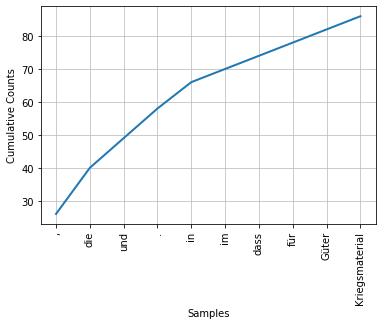

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [147]:
fdist.plot(10, cumulative=True)

---

## Spacy
Spacy.io can be used for processing textual data. You can download different models for your target language:
https://spacy.io/models

In this case we are using the German Model.


First we have to download the model to our machine. 

NOTE: The models can be quite large in size.

> python -m spacy download de_core_news_sm

In [157]:
# Then we import it to our project
nlp = spacy.load("de_core_news_sm")

In [159]:
# Processing the Text with Python
doc = nlp(text)

This means that we an access the elements, like in a dictionary. For instance to find the names of the dogs:

### Getting Noun Phrases

In [160]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['Die Schweiz', 'Kriegsgütern', 'keine bestehenden Konflikte', 'Menschenrechtsverletzungen', 'Der Grundsatz', 'die Praxis', 'April', 'der Bundesrat', 'Rüstungsexporte', 'Staaten', 'die', 'sich', 'Bürgerkrieg', 'Jemen', 'darunter Saudi-Arabien', 'das', 'dem Grundsatz', 'die Schweiz', 'keine Waffen', 'aktuelle Konflikte', 'Zwei Gesetze', 'mehrere internationale Abkommen', 'den Export', 'kriegsrelevanter Güter', 'Das Kriegsmaterialgesetz', 'atomare, biologische und chemische Waffen', 'Antipersonenminen', 'Streumunition', 'deren', 'Anderes Kriegsmaterial', 'Länder', 'die', 'Krieg', 'Das Güterkontrollgesetz', '"besondere militärische Güter', '(kein direkter Einsatz', 'Gefecht', '"Dual-Use-Güter', 'Sie', 'Krieg', 'internationale Abkommen', 'Embargos', 'dies', 'die', 'die globale Stabilität', 'es', 'Grund', 'Annahme', 'die Güter', 'terroristischen Zwecken', 'Exportbewilligungen', 'militärisch verwendbare Güter', 'das Staatssekretariat', 'Wirtschaft', 'Kriegsmaterial', 'Staaten',

In [190]:
# Part of Speech Tagging
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
propn = [token.lemma_ for token in doc if token.pos_ == "PROPN"]
aux = [token.lemma_ for token in doc if token.pos_ == "AUX"]
adp = [token.lemma_ for token in doc if token.pos_ == "ADP"]
sym = [token.lemma_ for token in doc if token.pos_ == "SYM"]
num = [token.lemma_ for token in doc if token.pos_ == "NUM"]

In [199]:
data = [len(verbs), len(nouns), len(propn), len(aux), len(adp), len(sym), len(num)]
labels = ['verbs', 'nouns', 'propn', 'aux', 'adp', 'sym', 'num']

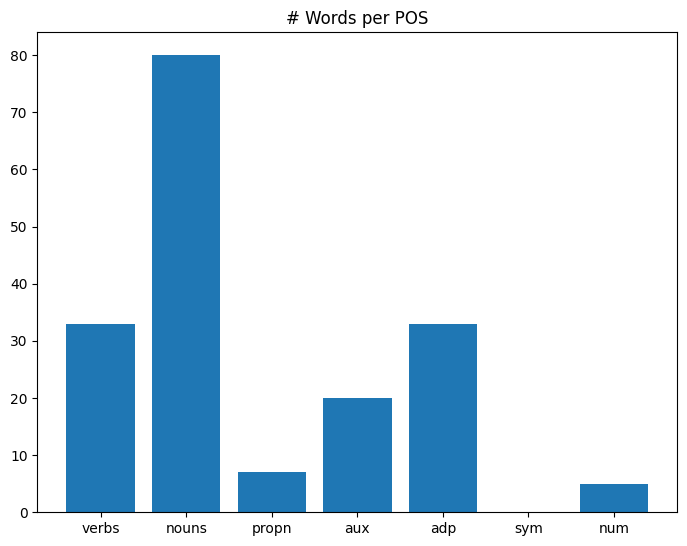

In [201]:
# Plotting the data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_title('# Words per POS')
ax.bar(labels, data)
plt.show()


### Entity Extraction
Getting Named entities out of the text with Spacy.


In [161]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Schweiz LOC
Staaten LOC
Bürgerkrieg im Jemen MISC
Saudi-Arabien LOC
Schweiz LOC
Kriegsmaterialgesetz MISC
Anderes Kriegsmaterial ORG
Krieg MISC
Krieg MISC
Staatssekretariat für Wirtschaft ORG
Strittig PER
Staaten LOC
Kriegsmaterial LOC
Jemen-Konflikt LOC
könnte".Dem Entscheid PER
Kriegsmaterialexporten MISC
Urne LOC
Länder LOC
Krieg im Jemen MISC
Sicherheitspolitischen Kommission des Nationalrats ORG
Staaten LOC
Schweizer MISC
Marcel Hänggi PER
Zürich LOC


---

## Dependency Visualization 

With spacy, we can easily display dependencies in a nice graph.

In [204]:
displacy.render(doc, style='dep')

---
# References:

Horizons Data: https://drive.switch.ch/index.php/s/yS1JUaG8DLotlKG

NLTK Book Chapter 1: https://www.nltk.org/book/ch01.html

Spacy: https://spacy.io/


